Start numpy and plotly; define some variables, then load data

In [1]:
import numpy as np
#from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
#init_notebook_mode(connected=True)
#import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline

model_name = "DRAM_twolayer"
data_directory = "data/" + model_name + "/"

num_runs = 10
iter_list = [0, 250, 1000, 4000, 16000, 32000, 64000, 125000, 250000, 500000, 100000, 200000]
max_blobs = 15
min_blobs = 1

num_iters = len(iter_list)
output_size = max_blobs - min_blobs + 1
chist = np.load(data_directory + 'choice_hist.npy') # chist[run, i]
cm = np.load(data_directory + 'choice_msdcv.npy') # cm[run, i ,t ,3]
#chist.shape
cmus = cm[:,:,:,0] # mean
csds = cm[:,:,:,1] # sd
ccvs = cm[:,:,:,2] # cv

In [2]:
chist_mu = np.mean(chist,axis=0)
cmus_mu = np.mean(cmus,axis=0)
cmus_min = np.min(cmus,axis=0)
cmus_max = np.max(cmus,axis=0)
csds_mu = np.mean(csds,axis=0)
csds_min = np.min(csds,axis=0)
csds_max = np.max(csds,axis=0)
ccvs_mu = np.mean(ccvs,axis=0)
ccvs_min = np.min(ccvs,axis=0)
ccvs_max = np.max(ccvs,axis=0)

In [ ]:
x = [1,2,3,4,5,6,7,8,9]

rf = np.divide(1,np.square(x))
d = np.sum(rf)
f = np.divide(rf,d)

In [3]:
def plot_hists(matrix,i_ind):
    fig, ax = plt.subplots(9,1,sharex=True, sharey=True,figsize=(8,16))
    x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    fig.tight_layout()
    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    tstr = 'I = ' + str(iter_list[i_ind]) 
    ax[0].set_title(tstr)
    for i in range(9):
        ax[i].plot(x,matrix[i,:])
        ax[i].set_title('I = ' + str(iter_list[i_ind]) + ', True Class = ' + str(i+1))
    plt.show()

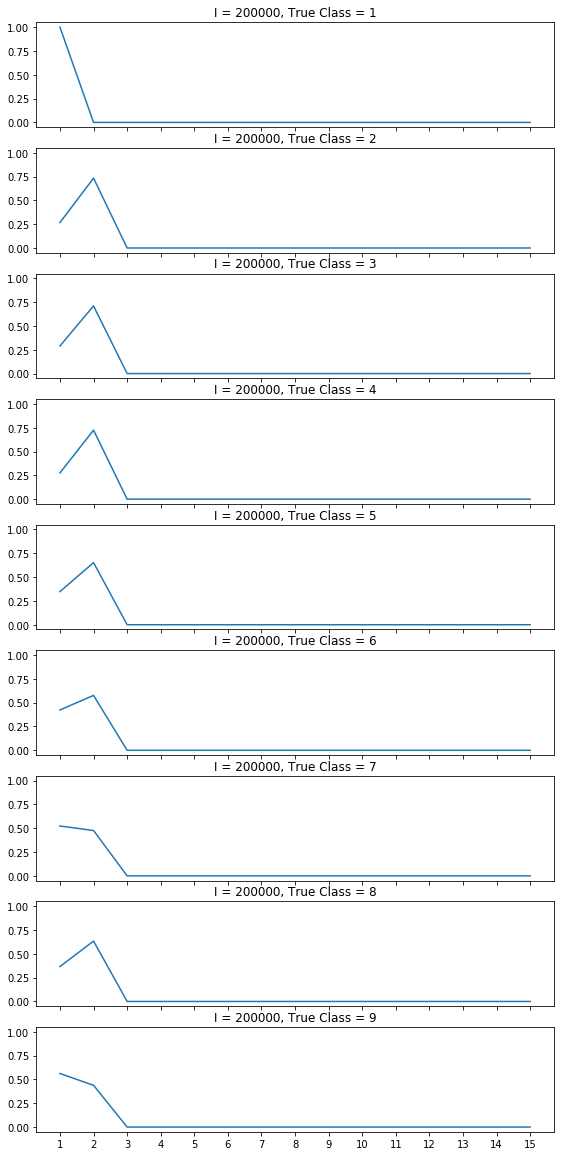

In [12]:
plot_hists(chist_mu[11,:,:],11) 

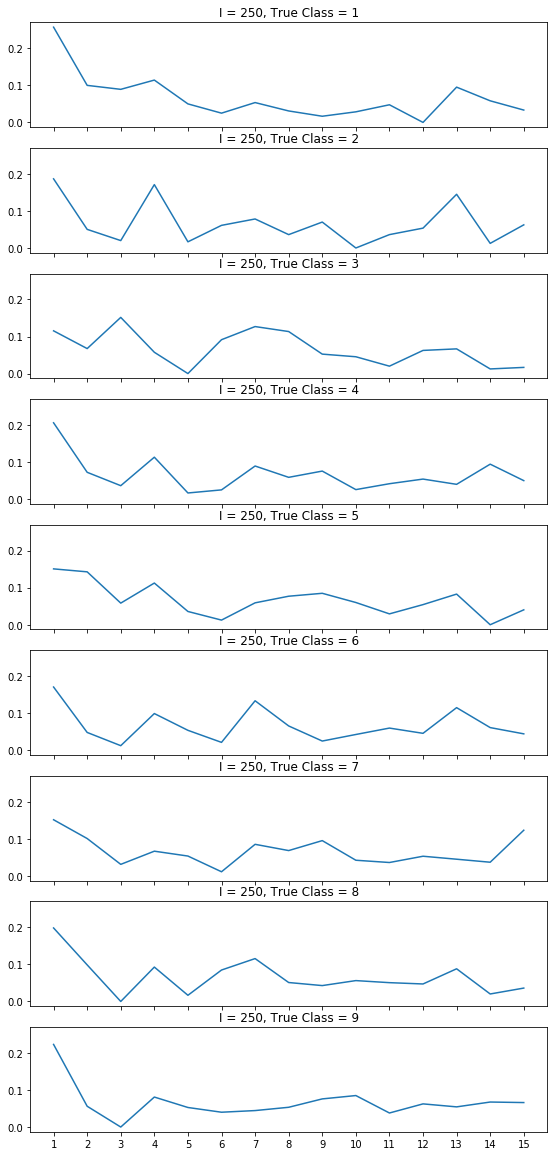

In [5]:
plot_hists(chist_mu[1,:,:],1)

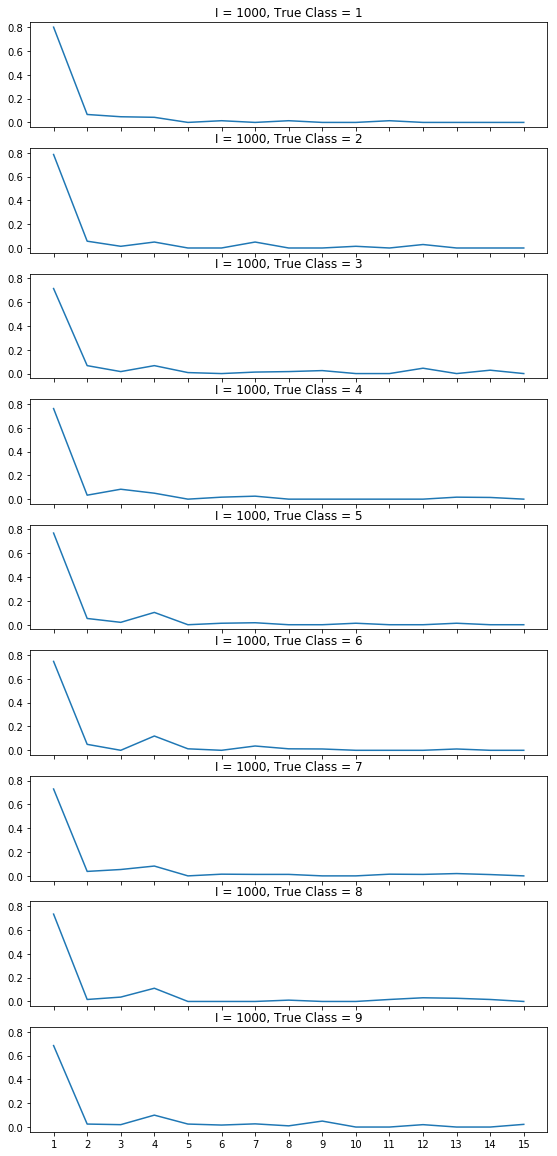

In [6]:
plot_hists(chist_mu[2,:,:],2)

In [7]:
def plot_stats(smu,smin,smax):
    fig, ax = plt.subplots(len(iter_list),1,sharex=True, sharey=True,figsize=(8,8))
    fig.tight_layout()
    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    for i in range(len(iter_list)):
        tstr = 'I = ' + str(iter_list[i])
        ax[i].set_title(tstr)
        ax[i].plot(x,smu[i,:],'k-')
        ax[i].fill_between(x,smin[i,:],smax[i,:], facecolor='orange')
    plt.show()

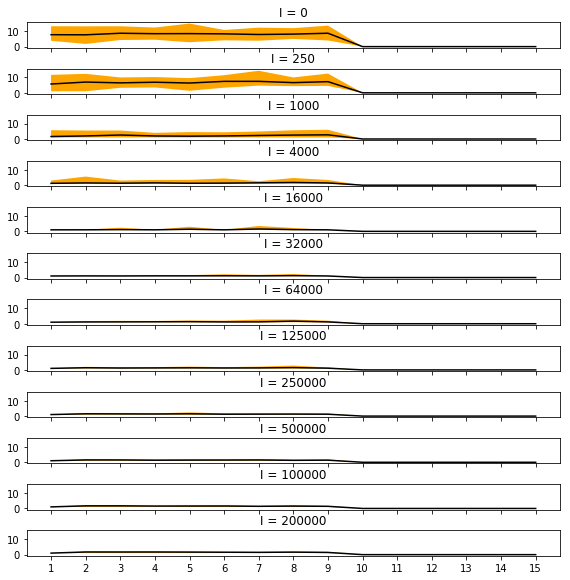

In [8]:
plot_stats(cmus_mu,cmus_min,cmus_max)

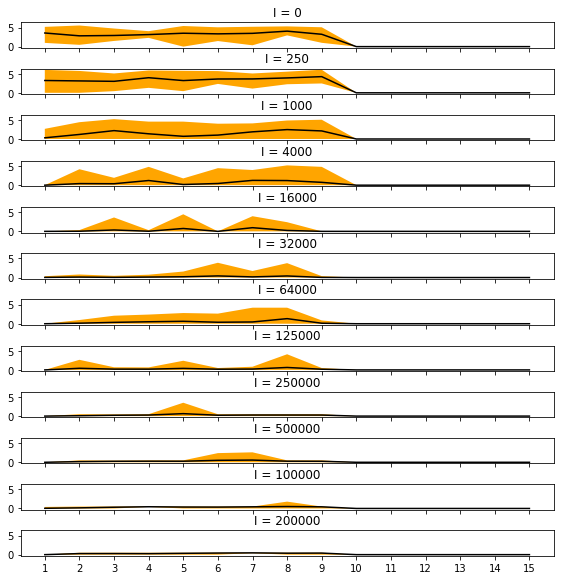

In [9]:
plot_stats(csds_mu,csds_min,csds_max)

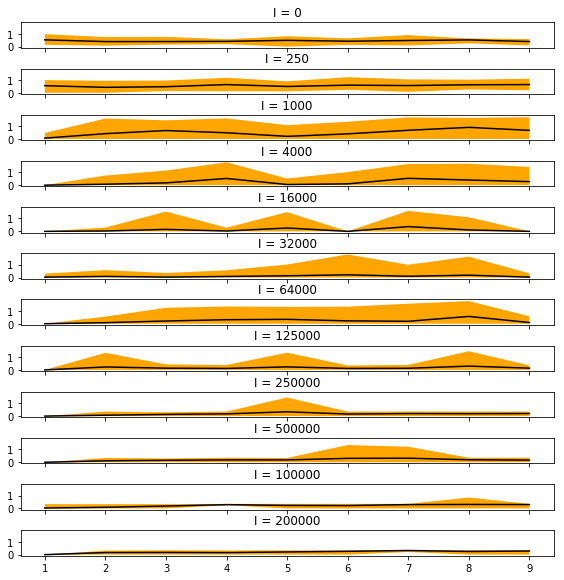

In [10]:
plot_stats(ccvs_mu,ccvs_min,ccvs_max)